<a href="https://colab.research.google.com/github/davidelgas/DataSciencePortfolio/blob/main/NLP_with_RAG/notebooks%20/NLP_with_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Project Objective and Limitations


## 1.1 Project Overview
The advent of modern automobile manufacturing has led to increased technical complexity, often resulting in mechanics opting to replace parts rather than diagnose and fix issues. This approach, while convenient for contemporary vehicles, poses a significant challenge for classic cars built 30 to 40 years ago, where replacement parts are scarce or non-existent.

To address this problem, this project aims to leverage Generative AI to create a "virtual mechanic." By utilizing a corpus of text gathered from a classic car forum, this AI-driven tool will be capable of understanding unstructured questions and providing relevant answers. This innovative solution aims to assist classic car enthusiasts and mechanics by offering expert guidance, thereby preserving the heritage and functionality of vintage automobiles.


In [ ]:
# Access to Google Drive
# This seems to propagate credentials better from its own cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


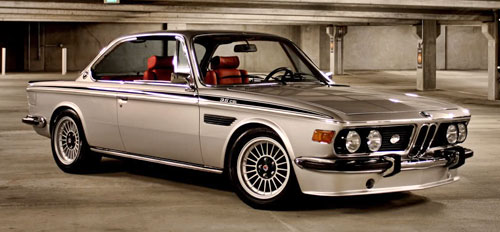

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/Colab Notebooks/NLP/BMW_E9.jpg')

1972 - 1974 BMW 3.0 CS

## 1.2 Objectives
The primary objective of this project is the development of a Natural Language Processing (NLP) model as part of a portfolio of AI projects that can be showcased to potential employers. This will include an outline of the necessary workflow with a comparision and selection of architectures, libraries and methods. This is a complement to my pursuit of a Masters Degree in Data Science.


## 1.3 Use Case
With this code, a user will be able to ask questions in plain, unstructured English and receive answers that are a result of previous similar questions from the forum used to create the corpus. The answers will also include results from pre-trained models, ensuring a rich and informed response. Users will see these answers in plain English. As a programmer, you have control over the extent to which the answers are sourced from the supplemental corpus versus the pre-trained model. However, users will not see the verbatim source text used to generate the answer.

## 1.4 Limitations and Challenges
Python will be the primary programming language. Google Colab will be used for the notebook with compute resources limited to CPUs. Data storage will be done in a Snowflake database. Where possible, a combination of open source and free resource will be used.

Budgetary constraints will play a part in several decisions on the specific workflow. Most noteably, these are known to include the use of CPUs over more powerful compute options.

## 1.4 Use Case
With this code, a user will be able to ask questions in plain, unstructured English and receive answers that are a result of previous similar questions from the forum used to create the corpus. The answers will also include results from pre-trained models, ensuring a rich and informed response. Users will see these answers in plain English. As a programmer, you have control over the extent to which the answers are sourced from the supplemental corpus versus the pre-trained model. However, users will not see the verbatim source text used to generate the answer.



## 1.5 Workflow for NLP RAG Model
**Natural Language Processing Architectures and Models**
   - Choose a pre-trained model such as DistilBERT for embeddings and T5 or GPT for generation. Possibly employ a strategy of using both for specific tasks (embeddings vs generation)

**Develop Corpus**
   - Gather and organize text data from sources such as a forum or published material.

**Remove Unnecessary Characters**
   - Clean the text by removing HTML tags, extra whitespace, non-printable characters, and other irrelevant elements.

**Convert Text to Lowercase**
   - Standardize the text by converting all characters to lowercase to ensure uniformity.

**Remove Stop Words**
   - Filter out common stop words to focus on more meaningful content.

**Deduplication**
   - Remove duplicate entries to ensure the uniqueness of the data.

**Lemmatization**
   - Convert words to their base or dictionary form to consolidate similar forms of a word.

**Entity Recognition and Anonymization**
   - Identify and anonymize personal information or specific entity names to maintain privacy.

**Filter Irrelevant Sections**
   - Remove sections of the text that do not contribute to the knowledge base or are off-topic.

**Consolidate Threads**
   - Combine related threads or posts to create a comprehensive view of discussions on similar topics.

**Clustering**
   - Group text segments by their semantic similarities to enhance the structure of the dataset.

**Summarize Corpus Content**
   - Condense your text data to highlight the most important information and insights from your corpus.

**Format into Questions and Answers**
   - Structure your text into a question-answer format suitable for training your RAG model.
   - Ensure the question string ends with a question mark for clarity.

**Tokenization**
   - Break down the text into smaller units called tokens. Use a tokenizer compatible with your chosen model, such as the BERT tokenizer.

**Embedding**
   - Convert tokens into numerical representations using embeddings. Use pre-trained embeddings from transformer models like BERT, DistilBERT, or T5.

**Build FAISS Index**
   - Create an index of the embeddings using FAISS for fast similarity searches.

**Query Processing and Search**
   - Generate embeddings for new queries and use the FAISS index to find the most similar questions in the corpus.

**Retrieve and Rank**
   - Fetch the top-N most similar questions and their corresponding answers from the corpus.
   - Concatenate the retrieved contexts to form a comprehensive input for the generative model.

**Answer Generation**
   - Employ a generative model like T5 or GPT to generate an answer based on the concatenated context and the query.

**Evaluation and Tuning**
   - Assess the model's performance using metrics like precision, recall, F1-score, and accuracy.
   - Fine-tune the pre-trained models on your specific dataset if necessary.

**Deploying the Demo**
   - (Optional) Create an interactive UI using tools like Flask or Streamlit.
   - Deploy the model to a server or cloud service for remote access.



# 2 Natural Language Processing Architectures and Models




This document provides an overview of various architectures, models, and tools used in natural language processing tasks. Understanding the strengths and weaknesses of different approaches is crucial for designing effective NLP systems tailored to specific use cases and requirements.



## 2.1 Traditional Machine Learning Architectures

### 2.1.1 Bag-of-Words (BoW)
- **Description:** Represents text data as a collection of unique words and their frequencies.
- **Example:** Term Frequency-Inverse Document Frequency (TF-IDF)
- **Pros:**
  - Simple and efficient representation.
  - Works well for tasks like sentiment analysis and document classification.
- **Cons:**
  - Ignores word order and context.
  - Doesn't capture semantic meanings well.

### 2.1.2 Word Embeddings
- **Description:** Represent words as dense vectors in a continuous vector space.
- **Examples:** Word2Vec, GloVe
- **Pros:**
  - Captures semantic meanings and relationships between words.
  - Provides dense vector representations suitable for downstream tasks.
- **Cons:**
  - Requires large amounts of data for training.
  - Struggles with out-of-vocabulary words.

### 2.1.3 Sequence Models
- **Description:** Models that capture the sequential nature of text data.
- **Examples:** Hidden Markov Models (HMM), Conditional Random Fields (CRF)
- **Pros:**
  - Captures sequential dependencies in data.
  - Suitable for tasks like named entity recognition and part-of-speech tagging.
- **Cons:**
  - Requires labeled sequential data for training.
  - Can be computationally intensive.


## 2.2 Deep Learning Architectures

### 2.2.1 Convolutional Neural Networks (CNN)
- **Description:** Deep learning models that use convolutional layers for feature extraction.
- **Examples:** TextCNN
- **Pros:**
  - Effective for capturing local dependencies in text data.
  - Can capture hierarchical patterns in data.
- **Cons:**
  - Requires large amounts of training data.
  - Limited ability to capture long-range dependencies.

### 2.2.2 Recurrent Neural Networks (RNN)
- **Description:** Neural networks that process sequences by iterating through elements.
- **Examples:** Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU)
- **Pros:**
  - Effective for capturing sequential dependencies in data.
  - Suitable for tasks like language modeling and machine translation.
- **Cons:**
  - Vulnerable to vanishing and exploding gradient problems.
  - Computationally expensive to train.

### 2.2.3 Transformers
- **Description:** Neural network architecture based entirely on self-attention mechanisms.
- **Examples:** BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pre-trained Transformer), T5 (Text-To-Text Transfer Transformer)
- **Pros:**
  - Captures long-range dependencies effectively.
  - Parallelizable training process.
- **Cons:**
  - Requires large amounts of computational resources.
  - Limited interpretability compared to traditional models.

## 2.3 Retrieval-Augmented Generation (RAG)

### 2.3.1 Knowledge-Enhanced Retrieval-Augmented Generation (KERAG)
- **Description:** A variant of RAG that incorporates knowledge graphs to enhance retrieval and generation.
- **Examples:** Graph-BERT
- **Pros:**
  - Integrates structured knowledge for improved understanding and generation.
  - Enables more coherent and contextually relevant responses.
- **Cons:**
  - Requires high-quality and curated knowledge graphs.
  - Increased computational complexity compared to standard RAG.

## 2.4 Other Architectures and Models

### 2.4.1 Pre-trained Models
- **Description:** Models pre-trained on large corpora and fine-tuned for specific tasks.
- **Examples:** BERT, GPT, T5
- **Pros:**
  - Leverage large amounts of unlabeled data for pre-training.
  - Achieve state-of-the-art performance on various NLP tasks.
- **Cons:**
  - Resource-intensive pre-training process.
  - May require substantial computational resources for fine-tuning.

### 2.4.2 Retriever-Generator Models
- **Description:** Models that combine retrieval and generation components for text generation tasks.
- **Examples:** RAG, KERAG
- **Pros:**
  - Incorporates both structured and unstructured information for generation.
  - Produces more diverse and contextually relevant responses.
- **Cons:**
  - Requires efficient retrieval mechanisms.
  - Increased complexity in model architecture.

### 2.4.3 Knowledge Graphs
- **Description:** Graph-based structures that represent knowledge and relationships between entities.
- **Examples:** ConceptNet, WordNet
- **Pros:**
  - Organizes knowledge in a structured format.
  - Enables reasoning and inference for downstream tasks.
- **Cons:**
  - Requires manual curation and maintenance.
  - Limited coverage and scalability.

### 2.4.4 Dense Passage Retrieval (DPR)
- **Description:** Technique for retrieving relevant passages from a large corpus for question answering.
- **Examples:** DenseRetrieval, TANDA
- **Pros:**
  - Efficient retrieval of contextually relevant information.
  - Suitable for large-scale question answering systems.
- **Cons:**
  - Computationally intensive for indexing large corpora.
  - May suffer from noise in retrieved passages.

### 2.4.5 Elastic Search
- **Description:** Distributed search and analytics engine for indexing and searching large volumes of data.
- **Examples:** Elasticsearch, Apache Solr
- **Pros:**
  - Scalable and distributed architecture.
  - Supports full-text search and complex query structures.
- **Cons:**
  - Requires infrastructure for deployment and maintenance.
  - Indexing and search performance may degrade with large datasets.

### 2.4.6 Anserini
- **Description:** Information retrieval toolkit built on Apache Lucene for research purposes.
- **Examples:** Pyserini, Anserini
- **Pros:**
  - Provides efficient indexing and retrieval capabilities.
  - Supports integration with various retrieval models.
- **Cons:**
  - Requires expertise in information retrieval concepts.
  - Limited documentation and community support.

### 2.4.7 BART (Bidirectional and Auto-Regressive Transformers)
- **Description:** Transformer-based model architecture capable of bidirectional and auto-regressive generation.
- **Examples:** Facebook BART
- **Pros:**
  - Supports both conditional and unconditional text generation.
  - Achieves state-of-the-art performance on various NLP tasks.
- **Cons:**
  - Requires large amounts of computational resources for training.
  - Limited interpretability of generated outputs.

## 2.5 Machine Learning Frameworks and Tools

### 2.5.1 TensorFlow
- **Description:** Open-source machine learning framework developed by Google for building and deploying ML models.
- **Pros:**
  - Comprehensive ecosystem with support for various deep learning architectures.
  - Scalable and efficient execution on both CPUs and GPUs.
- **Cons:**
  - Steeper learning curve compared to some other frameworks.
  - Limited support for dynamic computation graphs.

### 2.5.2 PyTorch
- **Description:** Open-source deep learning framework developed by Facebook's AI Research lab.
- **Pros:**
  - Pythonic and intuitive interface for model development.
  - Dynamic computation graph enables easier debugging and experimentation.
- **Cons:**
  - Less optimized for deployment in production compared to TensorFlow.
  - Limited built-in support for distributed training.

### 2.5.3 scikit-learn
- **Description:** Simple and efficient machine learning library built on NumPy, SciPy, and matplotlib.
- **Pros:**
  - Easy-to-use API for common machine learning tasks.
  - Comprehensive documentation and community support.
- **Cons:**
  - Limited support for deep learning models and architectures.
  - Less flexibility for customization compared to deep learning frameworks.

# 3 Develop Corpus




## 3.1 Data Ethics


The data collected here is a collection of posts from widely avaialble public sources. However, should this project move into a public forum additional steps will be necessary to endure PII is obfuscated or removed. In addition, this document shall serve as full disclosure of the projects goals and data gathering process.

## 3.2 Data Collection


The project leverages user-generated content from a domain-specific online forum as the training corpus. This data is largely unstructured, with minimal metadata available. The following tools were considered to gather the source text for the corpus:


### 3.2.1 Web Scraping
- **Tools:** Beautiful Soup, online SaaS products
    - **Pros:**
        - **Direct Access to Targeted Data:** Enables precise extraction of user-generated content from specific sections or threads within the forum.
        - **Efficiency in Data Collection:** Automated scripts can gather large volumes of data in a short amount of time, making it suitable for assembling significant datasets for NLP.
    - **Cons:**
        - **Potential for Incomplete Data:** May miss embedded content or dynamically loaded data, depending on the website’s structure.
        - **Ethical and Legal Considerations:** Scraping data from forums may raise concerns about user privacy and must adhere to the terms of service of the website.
        - **Very Platform Dependent:** Forum specific solutions result in forum specific data schemas that must be reverse engineered to for successful text extraction.


### 3.2.2 Forum-specific APIs
- **Tools:** Python (`requests` library for API calls and `json` library for handling responses)
    - **Pros:**
        - **Structured and Reliable Data Retrieval:** APIs provide structured data, making it easier to process and integrate into your project.
        - **Efficient and Direct Access:** Directly accessing the forum's data through its API is efficient, bypassing the need for HTML parsing.
        - **Compliance and Ethical Data Use:** Utilizing APIs respects the forum's data use policies and ensures access is in line with user agreements.
    - **Cons:**
        - **Rate Limiting:** APIs often have limitations on the number of requests that can be made in a certain timeframe, which could slow down data collection.
        - **API Changes:** Dependence on the forum's API structure means that changes or deprecation could disrupt your data collection pipeline.
        - **Access Restrictions:** Some data or functionalities might be restricted or require authentication, posing additional challenges for comprehensive data collection.

## 3.4 Summarization Strategies


Summarization in NLP involves condensing large texts into shorter versions, capturing the most critical information. This can be approached through multiple options. For this effort, the following solutions were scored to reduce the potential solution set:

| Provider                        | OpenAI               | Anthropic           | Meta (Facebook)                              | Google Research     | Amazon            |
|---------------------------------|----------------------|---------------------|---------------------------------------------|---------------------|-------------------|
| **Specific Package**            | GPT (GPT-2 )               | Claude (Claude 3)            | DistilBART (sshleifer/distilbart-cnn-12-6)  | T5 (t5-small)       | AWS Comprehend    |
| **Strengths**                     | Optimal for CPUs, free access | Latest version, enhanced safety features | Optimized for CPU usage, efficient resource usage | Efficient CPU usage, flexible, and powerful | Integrated AWS service, scalability |
| 1. CPU Performance              | 2 (GPT-2 optimized for CPUs) | 2 (Enhanced capabilities in Claude 3) | 2 (DistilBART optimized for CPUs)           | 2 (Efficient on CPUs) | 1 (General cloud performance) |
| 2. Free                         | 2 (GPT-2 is free)    | 0 (Research access mainly) | 2 (Open-source and free)                  | 2 (Open-source and free) | 0 (Paid service)  |
| 3. API Independence             | 1 (Can be run locally, no API needed) | 1 (Research and conditional access) | 2 (Completely API independent) | 2 (Can be run locally) | 0 (API-dependent service) |
| 4. Handling Varying Text Length | 2 (Good at handling different lengths) | 2 (Claude 3 designed for robust handling) | 2 (Handles varying lengths well) | 2 (Handles varying lengths efficiently) | 2 (Designed to scale) |
| 5. Ease of Integration          | 1 (Integration flexibility varies) | 1 (Varies by deployment) | 2 (Good documentation and community support) | 2 (Good documentation and support) | 2 (Tightly integrated with AWS ecosystem) |
| **Total Score**                 | 8                    | 6                   | 10                                          | 10                    | 5                 |

### Criteria Explanations
1. **CPU Performance:** Measures how well the solution performs on standard CPUs.
2. **Free:** Indicates if the solution is free to use.
3. **API Independence:** Indicates if the solution can be used without relying on an external API.
4. **Handling Varying Text Length:** Assesses how well the solution can manage different lengths of text input.
5. **Ease of Integration:** Measures the flexibility and support for integrating the solution into various environments.

### Scoring Explanations
0: Does not meet
2: Fully meets
1: Partially meets








### A test of solutions can be found in the Appenix. T5 was chosen based on bettter ROUGE scores.

## 3.4 Converting Corpus into Questions and Answers


## 3.5 Tokenization Strategies

Tokenization is a crucial preprocessing step in NLP, segmenting text into manageable units for further analysis or model training. The choice of tokenization strategy affects both the complexity of the model and its ability to understand the text.

### Word-level Tokenization
- **Tools:** NLTK, spaCy, TensorFlow/Keras Tokenizers, BPE, Hugging Face Tokenizers
    - **Pros:**
        - Preserves word integrity and semantic meaning, crucial for comprehension tasks.
        - Subword tokenization methods like BPE can efficiently handle unknown words.
    - **Cons:**
        - Can result in a large vocabulary size, increasing memory and processing requirements.
        - May overlook nuances in character-level variations.

### Character-level Tokenization
- **Tools:** Supported by deep learning frameworks like TensorFlow and Keras
    - **Pros:**
        - Captures morphological nuances at the character level, aiding languages with rich morphology.
        - Simplifies the vocabulary to a set of unique characters, reducing model complexity.
    - **Cons:**
        - Leads to longer input sequences, which can increase computational costs.
        - Loses direct access to semantic information encoded in words or phrases.

### Subword Tokenization (BPE and Hugging Face Tokenizers)
- **Tools** A blend of word-level and character-level tokenization, aiming to balance vocabulary size and semantic richness.
    - **Pros:**
        - Offers a middle ground, effectively managing vocabulary size while preserving semantic information.
        - Facilitates handling of rare or unknown words by breaking them down into recognizable subwords.
    - **Cons:**
        - Requires preprocessing to establish a subword vocabulary, adding complexity.
        - Generated subwords may lack standalone meaning, complicating interpretation.



### Model-Specific Tokenization
- **Tools:** Hugging Face's transformers library provides access to pre-built tokenizers corresponding to each pre-trained model, ensuring that tokenization is consistent with the model's original training data.

Examples:

- **For BERT:** AutoTokenizer.from_pretrained('bert-base-uncased')

- **For GPT-2:** AutoTokenizer.from_pretrained('gpt2')

- **For T5:** AutoTokenizer.from_pretrained('t5-small')


**Conclusion: I will be using Hugging Face for tokenization, sequencing and padding**


## 3.6 Embedding Strategies


# 4 Training and Evaluation




1. **PyTorch and Hugging Face Transformers**
   - **Pros:** PyTorch offers dynamic computation graphs that are intuitive for RAG model development. Hugging Face's Transformers library provides easy access to pre-trained models and tokenizers, facilitating both training and evaluation with extensive support for RAG architectures.
   - **Cons:** While highly flexible, this combination might require a steep learning curve for those not familiar with PyTorch or the Transformers library.

2. **TensorFlow and T5**
   - **Pros:** TensorFlow provides robust tools for model development and deployment, with T5 being a versatile model for text-to-text tasks, adaptable for RAG purposes. TensorFlow's extensive ecosystem includes TensorBoard for monitoring training processes.
   - **Cons:** TensorFlow's static computation graph can be less intuitive than PyTorch's dynamic graphs. T5's text-to-text format might require additional preprocessing steps.

3. **JAX and Flax/Haiku**
   - **Pros:** JAX offers accelerated NumPy operations and automatic differentiation, making it efficient for large-scale model training. Flax and Haiku provide neural network libraries for JAX, supporting complex RAG model architectures.
   - **Cons:** JAX's ecosystem is less mature, with fewer pre-trained models and community resources available compared to PyTorch and TensorFlow. This can make development and troubleshooting more challenging.


## 4.1 Hyperparameter Tuning

4.1 Hyperparameter Tuning
Tuning Strategy: Outline your strategy for hyperparameter tuning, including the tools or techniques (like grid search or random search) you plan to use.

## 4.2 Model Evaluation

Evaluation Metrics: Detail the metrics you will use to evaluate your model, such as F1 score, precision, recall, and explain why each is important for your project’s success.


The project's success will be assessed based on the accuracy and speed of responses generated by the language model.


1. **PyTorch and Hugging Face Transformers**
   - **Pros:** PyTorch offers dynamic computation graphs that are intuitive for RAG model development. Hugging Face's Transformers library provides easy access to pre-trained models and tokenizers, facilitating both training and evaluation with extensive support for RAG architectures.
   - **Cons:** While highly flexible, this combination might require a steep learning curve for those not familiar with PyTorch or the Transformers library.

2. **TensorFlow and T5**
   - **Pros:** TensorFlow provides robust tools for model development and deployment, with T5 being a versatile model for text-to-text tasks, adaptable for RAG purposes. TensorFlow's extensive ecosystem includes TensorBoard for monitoring training processes.
   - **Cons:** TensorFlow's static computation graph can be less intuitive than PyTorch's dynamic graphs. T5's text-to-text format might require additional preprocessing steps.

3. **JAX and Flax/Haiku**
   - **Pros:** JAX offers accelerated NumPy operations and automatic differentiation, making it efficient for large-scale model training. Flax and Haiku provide neural network libraries for JAX, supporting complex RAG model architectures.
   - **Cons:** JAX's ecosystem is less mature, with fewer pre-trained models and community resources available compared to PyTorch and TensorFlow. This can make development and troubleshooting more challenging.


# 5 Results and Analysis

## 5.1 Experimental Results
5.1 Experimental Results
Visualizations: Include charts or graphs that visualize the results, such as learning curves or performance benchmarks.

## 5.2 Performance Analysis

5.2 Performance Analysis
Comparative Analysis: If applicable, compare the performance of your model against baseline models or previous benchmarks in similar tasks

# 6 Deployment and Integration
6.1 Deployment Tools
Deployment Plan: Provide a step-by-step plan for deploying the model, including any cloud resources or services used.
6.2 Integration Strategies
API Specifications: If your model will be accessed via an API, provide the API specifications including endpoint descriptions, request format, and response format.

## 6.1 Deployment Tools
# Deployment and Serving Infrastructure Selection

1. **Hugging Face Spaces**
   - **Pros:** Provides a simple and direct way to deploy and share machine learning models, including RAG models. It supports interactive web-based applications and API endpoints, making it ideal for showcasing projects.
   - **Cons:** While convenient for prototypes and demonstrations, it might not offer the scalability and control needed for high-demand production environments.

2. **AWS SageMaker**
   - **Pros:** Offers a fully managed service that enables data scientists and developers to build, train, and deploy machine learning models at scale. SageMaker supports direct deployment of PyTorch models, including those built with the Hugging Face Transformers library, with robust monitoring and security features.
   - **Cons:** Can be more expensive and requires familiarity with AWS services. The setup and management might be complex for smaller projects or those new to cloud services.

3. **Docker + Kubernetes**
   - **Pros:** This combination offers flexibility and scalability for deploying machine learning models. Docker containers make it easy to package your RAG model with all its dependencies, while Kubernetes provides orchestration to manage and scale your deployment across multiple instances or cloud providers.
   - **Cons:** Requires significant DevOps knowledge to setup, manage, and scale. It might be overkill for simple or one-off deployments.


## Decision
For deploying a RAG model, especially within an academic or portfolio context where ease of use, accessibility, and cost-effectiveness are key considerations, Hugging Face Spaces is highly recommended. It allows you to quickly deploy your models with minimal setup and offers a user-friendly platform for showcasing your work to a wide audience. For projects that might evolve into more scalable or commercial applications, starting with Docker for containerization and then moving to a Kubernetes-based deployment as needs grow could be a strategic approach. This path provides a balance between initial simplicity and long-term scalability.

## 6.2 Integration Strategies

# 7 Reflection and Learning

7.1 Challenges Faced
Problem-Solving Approaches: Discuss specific problems you anticipate and outline the approaches you plan to take to solve them.
7.2 Lessons Learned
Documentation of Insights: Plan to document insights and lessons learned throughout the project to guide future projects.

## 7.1 Challenges Faced


## 7.2 Lessons Learned

# 8 Future Work and Improvements

8.1 Potential Enhancements
Technology Upgrades: Identify areas for technological upgrades or enhancements, like implementing more advanced NLP techniques or exploring newer models.
8.2 Areas for Further Research
Extended Applications: Suggest areas for extending the application of your project to other types of vehicles or different domains.

## 8.1 Potential Enhancements


## 3.3 Data Storage and Database


Efficient data storage and management are pivotal for the project, focusing on accommodating extensive unstructured data from various sources. The project explores two main classes of storage solutions: Cloud Storage and Local Storage, each offering unique benefits and challenges.

### 3.3.1 Cloud Storage
Cloud storage solutions offer scalability, reliability, and remote access, making them suitable for projects with dynamic data needs and global access requirements.

- **Tools:** Snowflake (for relational data), MongoDB Atlas (for NoSQL data)
    - **Pros:**
        - **Scalability:** Easily scales to meet growing data demands without the need for physical infrastructure management.
        - **Accessibility:** Provides global access to the data, facilitating collaboration and remote work.
        - **Maintenance and Security:** Cloud providers manage the security, backups, and maintenance, reducing the administrative burden.
    - **Cons:**
        - **Cost:** While scalable, costs can increase significantly with data volume and throughput.
        - **Internet Dependence:** Requires consistent internet access, which might be a limitation in some scenarios.
        - **Data Sovereignty:** Data stored in the cloud may be subject to the laws and regulations of the host country, raising concerns about compliance and privacy.


### 3.3.2 Local Storage
Local storage solutions rely on on-premises or personal hardware, providing full control over the data and its management but requiring more direct oversight.

- **Tools:** MySQL (for relational data), MongoDB (Local installation for NoSQL data)
    - **Pros:**
        - **Control:** Complete control over the data storage environment and configurations.
        - **Cost:** No ongoing costs related to data storage size or access rates, aside from initial hardware and setup.
        - **Connectivity:** No reliance on internet connectivity for access, ensuring data availability even in offline scenarios.
    - **Cons:**
        - **Scalability:** Physical limits to scalability; expanding storage capacity requires additional hardware.
        - **Maintenance:** Requires dedicated resources for maintenance, backups, and security, increasing the administrative burden.
        - **Accessibility:** Data is not as easily accessible from remote locations, potentially hindering collaboration and remote access needs.


**Conclusion: I will be using Snowflake to store my corpus.**

## 8.2 Areas for Further Research

# 9 Code

| Step # | Step Name                 | Step Functionality                                | Step Input File Name                      | Step Output File Name                         |
|--------|---------------------------|---------------------------------------------------|-------------------------------------------|-----------------------------------------------|
| 9      | Prepare Enviornment            | Load libraries and methods                  | None                                      | None
| 1      | Create Corpus             | Fetch and process forum threads                  | None                                      | e9_forum_corpus_dirty.csv                     |
| 2      | Clean Corpus              | Clean and preprocess forum data                  | e9_forum_corpus_dirty.csv                 | e9_forum_corpus_clean.csv                     |
| 3      | Summarize Corpus          | Summarize forum data using T5 model              | e9_forum_corpus_clean.csv                 | e9_forum_corpus_summarized.csv                |
| 4      | Create QA Schema          | Transform summarized data into QA format         | e9_forum_corpus_summarized.csv            | e9_forum_corpus_qa.csv                        |
| 5      | Tokenize and Embed        | Tokenize and embed QA data using T5 model        | e9_forum_corpus_qa.csv                    | e9_forum_corpus_tok.csv                       |
| 6      | Generate FAISS Embeddings | Generate and save FAISS embeddings               | e9_forum_corpus_tok.csv                   | question_embeddings_t5.npy, answer_embeddings_t5.npy |                         |
| 7      | Save Corpus to Snowflake  | Save cleaned and processed corpus to Snowflake   | e9_forum_corpus_clean.csv                 | Data saved to Snowflake database   
| 8      | Query Processing and Search | Process and search queries using FAISS index     | faiss_index_t5.index, e9_forum_corpus_tok.csv | None (process queries and display results)    |
           |


## Step 0: Prepare Enviornment

In [ ]:
# Step 0: Prepare Enviornment
# Install libraries and methods

import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# transformers
try:
    from transformers import (
        BertTokenizer, BertModel, pipeline, AutoTokenizer, DistilBertModel,
        T5Tokenizer, T5ForConditionalGeneration, T5EncoderModel,
        GPT2Tokenizer, GPT2LMHeadModel, AutoModelForSeq2SeqLM
    )
except ImportError:
    !pip install transformers
    from transformers import (
        BertTokenizer, BertModel, pipeline, AutoTokenizer, DistilBertModel,
        T5Tokenizer, T5ForConditionalGeneration, T5EncoderModel,
        GPT2Tokenizer, GPT2LMHeadModel, AutoModelForSeq2SeqLM
    )

# gensim
try:
    from gensim.parsing.preprocessing import STOPWORDS
except ImportError:
    !pip install gensim
    from gensim.parsing.preprocessing import STOPWORDS

# sumy
try:
    from sumy.parsers.plaintext import PlaintextParser
    from sumy.summarizers.lex_rank import LexRankSummarizer
    from sumy.nlp.tokenizers import Tokenizer
except ImportError:
    !pip install sumy
    from sumy.parsers.plaintext import PlaintextParser
    from sumy.summarizers.lex_rank import LexRankSummarizer
    from sumy.nlp.tokenizers import Tokenizer

# datasets
try:
    from datasets import load_metric
except ImportError:
    !pip install datasets
    from datasets import load_metric

# evaluate
try:
    import evaluate
except ImportError:
    !pip install evaluate
    import evaluate

# pyspellchecker
try:
    from spellchecker import SpellChecker
except ImportError:
    import sys
    !{sys.executable} -m pip install pyspellchecker
    from spellchecker import SpellChecker

# faiss
try:
    import faiss
except ImportError:
    !pip install faiss-cpu
    import faiss

# snowflake.connector
try:
    import snowflake.connector
except ImportError:
    !pip install snowflake-connector-python
    import snowflake.connector

# pandas
try:
    import pandas as pd
except ImportError:
    !pip install pandas
    import pandas as pd

# requests
try:
    import requests
except ImportError:
    !pip install requests
    import requests

# BeautifulSoup
try:
    from bs4 import BeautifulSoup
except ImportError:
    !pip install beautifulsoup4
    from bs4 import BeautifulSoup

# nltk
try:
    import nltk
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
except ImportError:
    !pip install nltk
    import nltk
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

# re
try:
    import re
except ImportError:
    !pip install re
    import re

# langdetect
try:
    from langdetect import detect
except ImportError:
    !pip install langdetect
    from langdetect import detect

# torch
try:
    import torch
except ImportError:
    !pip install torch
    import torch

# numpy
try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np

# pyLDAvis
try:
    import pyLDAvis
except ImportError:
    !pip install pyLDAvis
    import pyLDAvis

# pickle
try:
    import pickle
except ImportError:
    !pip install pickle
    import pickle

# sklearn
try:
    from sklearn.decomposition import LatentDirichletAllocation
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
except ImportError:
    !pip install scikit-learn
    from sklearn.decomposition import LatentDirichletAllocation
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

# Other necessary imports
import time
import itertools
from concurrent.futures import ThreadPoolExecutor
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 10.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=04c3cfe1633fe5348e35a36a7049e4ecc5e889e00c945b0fb3e027739009c102
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.5 MB/s eta 0:00:00


## Step 1a Create corpus

In [14]:
# Step 1 Create Corpus
# Fetch and process forum threads
# Corpus created in LDA notebook can be used.

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

def forum_thread_ids():
    threads = 1  # Set the number of incremental threads to process here

    file_path = os.path.join(BASE_PATH, 'e9_forum_thread_ids.csv')

    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        e9_forum_thread_ids = pd.read_csv(file_path)
        last_thread_id = int(e9_forum_thread_ids['thread_id'].iloc[-1])
    else:
        e9_forum_thread_ids = pd.DataFrame(columns=['thread_id'])
        last_thread_id = 0

    next_thread_id = last_thread_id + 1
    new_urls = [{'thread_id': thread_id} for thread_id in range(next_thread_id, next_thread_id + threads)]

    new_df = pd.DataFrame(new_urls)
    e9_forum_thread_ids = pd.concat([e9_forum_thread_ids, new_df], ignore_index=True)
    e9_forum_thread_ids.to_csv(file_path, index=False)

    print(f"Starting with thread_id {last_thread_id}")
    print(f"Processing additional {threads} thread(s)")
    print(f"Ending with thread_id {next_thread_id + threads - 1}")

    return new_df

def forum_thread_url(df):
    if df.empty:
        print("No new threads to process.")
        return pd.DataFrame()

    pages = 1

    for index, row in df.iterrows():
        thread_id = row['thread_id']
        thread_url = f"https://e9coupe.com/forum/threads/{thread_id}"
        for i in range(1, pages + 1):
            page_url = f"{thread_url}/?page={i}"
            response = requests.get(page_url)
            soup = BeautifulSoup(response.text, 'html.parser')
            title = soup.find('title').get_text()
            thread_title = title.split('|')[0].strip()
            df.at[index, 'thread_url'] = page_url
            df.at[index, 'thread_title'] = thread_title

    df.to_csv(os.path.join(BASE_PATH, 'e9_forum_thread_url.csv'), index=False)
    return df

def forum_thread_first_post(df):
    data = []

    for thread_id, thread_url, thread_title in zip(df['thread_id'], df['thread_url'], df['thread_title']):
        response = requests.get(thread_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        first_post = soup.find('article', class_='message-body')
        post_content = first_post.get_text(strip=True) if first_post else "No content found"
        data.append({'thread_id': thread_id, 'thread_first_post': post_content})

    forum_first_post = pd.DataFrame(data)
    forum_first_post.to_csv(os.path.join(BASE_PATH, 'e9_forum_first_post.csv'), index=False)
    return forum_first_post

def forum_thread_all_post(df):
    post_data = []
    for index, row in df.iterrows():
        response = requests.get(row['thread_url'])
        soup = BeautifulSoup(response.text, 'html.parser')
        articles = soup.find_all('article', class_='message--post')
        for article in articles:
            post_timestamp = article.find('time')['datetime'] if article.find('time') else 'N/A'
            content = article.find('div', class_='bbWrapper').get_text(strip=True)
            post_data.append({'thread_id': row['thread_id'], 'post_raw': content})

    e9_forum_posts = pd.DataFrame(post_data)
    e9_forum_posts['thread_all_posts'] = e9_forum_posts['post_raw'].astype(str)
    e9_forum_thread_all_post = e9_forum_posts.groupby('thread_id')['thread_all_posts'].agg(lambda x: ' '.join(x)).reset_index()
    e9_forum_thread_all_post.to_csv(os.path.join(BASE_PATH, 'e9_forum_thread_all_post.csv'), index=False)
    return e9_forum_thread_all_post

def forum_corpus(e9_forum_thread_url, e9_forum_thread_first_post, e9_forum_thread_all_post):
    agg_df_1 = pd.merge(e9_forum_thread_url, e9_forum_thread_first_post, on='thread_id', how='left')
    agg_df_2 = pd.merge(agg_df_1, e9_forum_thread_all_post, on='thread_id', how='left')

    e9_forum_corpus = agg_df_2.dropna()
    corpus_path = os.path.join(BASE_PATH, 'e9_forum_corpus.csv')
    if os.path.exists(corpus_path) and os.path.getsize(corpus_path) > 0:
        existing_corpus = pd.read_csv(corpus_path)
        e9_forum_corpus = pd.concat([existing_corpus, e9_forum_corpus]).drop_duplicates().reset_index(drop=True)

    e9_forum_corpus.columns = e9_forum_corpus.columns.str.upper()
    e9_forum_corpus.to_csv(os.path.join(BASE_PATH, 'e9_forum_corpus_dirty.csv'), index=False)
    return e9_forum_corpus

def main():
    e9_forum_thread_ids = forum_thread_ids()
    e9_forum_thread_url_df = forum_thread_url(e9_forum_thread_ids)
    e9_forum_thread_first_post_df = forum_thread_first_post(e9_forum_thread_url_df)
    e9_forum_thread_all_post_df = forum_thread_all_post(e9_forum_thread_url_df)
    e9_forum_corpus_df = forum_corpus(e9_forum_thread_url_df, e9_forum_thread_first_post_df, e9_forum_thread_all_post_df)
    print(f"Output saved to {os.path.join(BASE_PATH, 'e9_forum_corpus_dirty.csv')}")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting with thread_id 0
Processing additional 1 thread(s)
Ending with thread_id 1
Output saved to /content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_dirty.csv


## Step 1b Ingest corpus from LDA workbook

In [36]:
# Data here is from LDA workbook stored in Snowflake


def load_credentials(path_to_credentials):
    with open(path_to_credentials, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def fetch_data_from_snowflake():
    conn = snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT'),
    )

    cur = conn.cursor()

    query = """
    SELECT THREAD_TITLE, THREAD_FIRST_POST FROM "E9_CORPUS"."E9_CORPUS_SCHEMA"."E9_FORUM_CORPUS_DIRTY";
    """
    cur.execute(query)
    e9_forum_corpus = cur.fetch_pandas_all()

    cur.close()
    conn.close()

    # Print the count of records retrieved
    print(f"Number of records retrieved: {len(e9_forum_corpus)}")
    return e9_forum_corpus

# Main sequence
path_to_credentials = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'

# Load credentials
load_credentials(path_to_credentials)

# Fetch data from Snowflake and print the count of records retrieved
e9_forum_corpus = fetch_data_from_snowflake()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of records retrieved: 10


## Step 2 Clean Corpus

In [37]:
# Step 2 Clean Corpus
# Clean and preprocess forum data

def load_credentials(path_to_credentials):
    with open(path_to_credentials, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def fetch_data_from_snowflake():
    conn = snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT'),
    )

    cur = conn.cursor()

    query = """
    SELECT THREAD_ID, THREAD_TITLE, THREAD_FIRST_POST, THREAD_ALL_POSTS
    FROM "E9_CORPUS"."E9_CORPUS_SCHEMA"."E9_FORUM_CORPUS_DIRTY";
    """
    cur.execute(query)
    e9_forum_corpus = cur.fetch_pandas_all()

    cur.close()
    conn.close()

    # Print the count of records retrieved
    print(f"Number of records retrieved: {len(e9_forum_corpus)}")
    return e9_forum_corpus

def remove_urls(df):
    """Removes URLs from the text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: url_pattern.sub(r'', str(text)))
    return df

def alpha_numeric(df):
    """Removes non-alphanumeric characters and unwanted patterns from text."""
    pattern_email = re.compile(r'\S*@\S*\s?')
    pattern_non_alpha = re.compile(r'[^a-zA-Z0-9\s]')
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: pattern_non_alpha.sub('', pattern_email.sub('', str(text))))
        df[column] = df[column].apply(lambda text: re.sub(r'\s+', ' ', text).strip())  # Remove extra spaces
    return df

def remove_stop_words(df):
    """Removes stop words from the text."""
    stop_words_set = set(stopwords.words('english')).union({'car', 'csi', 'cs', 'csl', 'e9', 'coupe', 'http', 'https', 'www', 'ebay', 'bmw', 'html'})
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words_set and len(word) > 2]))
    return df

def tokenize_and_lemmatize(df):
    """Tokenizes and lemmatizes the text in specified columns."""
    lemmatizer = WordNetLemmatizer()
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]))
    return df

def spell_check(df):
    """Corrects spelling errors in the text with caching."""
    spell = SpellChecker()
    cache = {}

    def correct_word(word):
        if word in cache:
            return cache[word]
        else:
            correction = spell.correction(word) or word
            cache[word] = correction
            return correction

    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].apply(lambda text: ' '.join([correct_word(word) for word in text.split()]))
    return df

def clean_nan_values(df):
    """Removes or replaces NaN values in the dataset and converts all entries to strings."""
    df.fillna('', inplace=True)
    for column in ['THREAD_TITLE', 'THREAD_FIRST_POST', 'THREAD_ALL_POSTS']:
        df[column] = df[column].astype(str)
    return df

def main():
    """Main function to run the data processing pipeline."""
    # Load credentials
    path_to_credentials = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'
    load_credentials(path_to_credentials)

    # Fetch data from Snowflake
    e9_forum_corpus = fetch_data_from_snowflake()

    # Process the data
    df = remove_urls(e9_forum_corpus)
    df = alpha_numeric(df)
    df = remove_stop_words(df)
    df = tokenize_and_lemmatize(df)
    df = spell_check(df)  # Apply spell check after tokenization and lemmatization
    df = clean_nan_values(df)  # Final NaN cleaning and type conversion step
    df.columns = df.columns.str.upper()  # Convert column names to uppercase

    # Save the cleaned data
    output_path = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_clean.csv'
    df.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of records retrieved: 10
Cleaned data saved to /content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_clean.csv


## Step 3 Summarize Corpus

In [38]:
# Step 3 Summarize Corpus
# Summarize forum data using T5 model

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

# Load the model and tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Load e9_forum_corpus_clean DataFrame from the CSV
e9_forum_corpus_clean = pd.read_csv(os.path.join(BASE_PATH, 'e9_forum_corpus_clean.csv'))

# Load the existing summarized corpus if it exists, otherwise create it
summarized_corpus_path = os.path.join(BASE_PATH, 'e9_forum_corpus_summarized.csv')
e9_forum_corpus_summarized = pd.read_csv(summarized_corpus_path) if os.path.exists(summarized_corpus_path) and os.path.getsize(summarized_corpus_path) > 0 else pd.DataFrame(columns=e9_forum_corpus_clean.columns)

# Calculate the starting THREAD_ID of the summarized corpus
starting_thread_id = e9_forum_corpus_summarized['THREAD_ID'].max() if not e9_forum_corpus_summarized.empty else 0

# Identify new entries to be processed
new_entries = e9_forum_corpus_clean[~e9_forum_corpus_clean['THREAD_ID'].isin(e9_forum_corpus_summarized['THREAD_ID'])].copy()

# Calculate ending_thread_id and threads_processed
ending_thread_id = new_entries['THREAD_ID'].max() if not new_entries.empty else starting_thread_id
threads_processed = len(new_entries) if not new_entries.empty else 0

print(f"Starting with thread_id {starting_thread_id}")
print(f"Processing additional {threads_processed} thread(s)")
print(f"Ending with thread_id {ending_thread_id}")

def T5_summarize(text):
    """Summarization using T5."""
    try:
        if text.strip() == "":
            return text

        unformatted_text = text.replace("\n", " ")

        inputs = tokenizer(
            unformatted_text,
            max_length=900,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            add_special_tokens=True,
            return_attention_mask=True
        )

        summary_ids = model.generate(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_length=50,
            min_length=10,
            length_penalty=2.0,
            num_beams=2,
            early_stopping=True
        )

        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        return summary if summary else text
    except Exception as e:
        return str(e)

def main():
    # Check if 'THREAD_ALL_POSTS' column exists in new entries
    if 'THREAD_ALL_POSTS' in new_entries.columns:
        unique_texts = new_entries['THREAD_ALL_POSTS'].drop_duplicates()
        summaries = unique_texts.apply(T5_summarize)
        summary_map = dict(zip(unique_texts, summaries))
        new_entries.loc[:, 'Summarized_Thread'] = new_entries['THREAD_ALL_POSTS'].map(summary_map)

        # Append the new summarized data to the existing summarized corpus
        updated_summarized_corpus = pd.concat([e9_forum_corpus_summarized, new_entries], ignore_index=True)

        # Save the results with the new summarized column
        updated_summarized_corpus.to_csv(summarized_corpus_path, index=False)

        print(f"Summarization completed and saved to {summarized_corpus_path}")
    else:
        print("Error: Column 'THREAD_ALL_POSTS' does not exist in the dataset.")

if __name__ == "__main__":
    main()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Starting with thread_id 0
Processing additional 10 thread(s)
Ending with thread_id 10
Summarization completed and saved to /content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_summarized.csv


## Step 4 Create QA Schema

In [40]:
# Step 4 Create QA Schema
# Transform summarized data into QA format

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

# Load the dataset from Step 2
df_summarized = pd.read_csv(os.path.join(BASE_PATH, 'e9_forum_corpus_summarized.csv'))

# Load the existing QA corpus if it exists
qa_corpus_path = os.path.join(BASE_PATH, 'e9_forum_corpus_qa.csv')
df_qa = pd.read_csv(qa_corpus_path) if os.path.exists(qa_corpus_path) and os.path.getsize(qa_corpus_path) > 0 else pd.DataFrame(columns=['THREAD_ID', 'QUESTION', 'ANSWER'])

# Calculate the starting THREAD_ID of the QA corpus
starting_thread_id = df_qa['THREAD_ID'].max() if not df_qa.empty else 0

# Identify new entries to be processed
new_entries = df_summarized[~df_summarized['THREAD_ID'].isin(df_qa['THREAD_ID'])]

# Calculate ending_thread_id and threads_processed
ending_thread_id = new_entries['THREAD_ID'].max() if not new_entries.empty else starting_thread_id
threads_processed = len(new_entries) if not new_entries.empty else 0

print(f"Starting with thread_id {starting_thread_id}")
print(f"Processing additional {threads_processed} thread(s)")
print(f"Ending with thread_id {ending_thread_id}")

def create_qa_schema(df):
    """Creates a QA schema by renaming and dropping specific columns."""
    df.rename(columns={'Summarized_Thread': 'ANSWER', 'THREAD_FIRST_POST': 'QUESTION'}, inplace=True)
    df.drop(['THREAD_TITLE', 'THREAD_ALL_POSTS'], axis=1, inplace=True)
    return df

def main():
    if not new_entries.empty:
        # Process the new entries to create QA schema
        df_qa_new = create_qa_schema(new_entries.dropna())

        # Append the new QA data to the existing QA corpus
        updated_qa_corpus = pd.concat([df_qa, df_qa_new], ignore_index=True)

        # Save the updated QA corpus
        updated_qa_corpus.to_csv(qa_corpus_path, index=False)

        print(f"Output saved to {qa_corpus_path}")
    else:
        print("No new entries to process.")

if __name__ == "__main__":
    main()

Starting with thread_id 0
Processing additional 10 thread(s)
Ending with thread_id 10
Output saved to /content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_qa.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 5 Tokenize and Embed

In [41]:
## Step 5 Tokenize and Embed
# Tokenize and embed QA data using T5 mode

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

# Load the DataFrame from your CSV file
df_qa = pd.read_csv(os.path.join(BASE_PATH, 'e9_forum_corpus_qa.csv'))

# Load the existing tokenized and embedded data if it exists, otherwise create an empty DataFrame
embedded_corpus_path = os.path.join(BASE_PATH, 'e9_forum_corpus_tok.csv')
df_embedded = pd.read_csv(embedded_corpus_path) if os.path.exists(embedded_corpus_path) and os.path.getsize(embedded_corpus_path) > 0 else pd.DataFrame(columns=df_qa.columns)

# Calculate the starting THREAD_ID of the embedded corpus
starting_thread_id = df_embedded['THREAD_ID'].max() if not df_embedded.empty else 0

# Identify new entries to be processed
new_entries = df_qa[~df_qa['THREAD_ID'].isin(df_embedded['THREAD_ID'])].copy()

# Calculate ending_thread_id and threads_processed
ending_thread_id = new_entries['THREAD_ID'].max() if not new_entries.empty else starting_thread_id
threads_processed = len(new_entries) if not new_entries.empty else 0

print(f"Starting with thread_id {starting_thread_id}")
print(f"Processing additional {threads_processed} thread(s)")
print(f"Ending with thread_id {ending_thread_id}")

# Initialize the T5 tokenizer and encoder model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small")

# Function to tokenize text using T5 tokenizer
def tokenize_text(text):
    return tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)["input_ids"]

# Function to embed text using T5 encoder model
def embed_text(tokens):
    inputs = torch.tensor(tokens).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # Average pooling
    return embeddings

def process_new_entries(entries):
    entries["Question_Tokens"] = entries["QUESTION"].apply(lambda x: tokenize_text(x).squeeze().tolist())
    entries["Answer_Tokens"] = entries["ANSWER"].apply(lambda x: tokenize_text(x).squeeze().tolist())
    entries["Question_Embeddings"] = entries["Question_Tokens"].apply(embed_text)
    entries["Answer_Embeddings"] = entries["Answer_Tokens"].apply(embed_text)
    return entries

def main():
    if not new_entries.empty:
        processed_entries = process_new_entries(new_entries)

        # Append the new processed data to the existing embedded corpus
        updated_embedded_corpus = pd.concat([df_embedded, processed_entries], ignore_index=True)

        # Save the updated corpus
        updated_embedded_corpus.to_csv(embedded_corpus_path, index=False)

        print(f"Embedding completed and saved to {embedded_corpus_path}")
    else:
        print("No new entries to process.")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting with thread_id 0
Processing additional 10 thread(s)
Ending with thread_id 10


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Embedding completed and saved to /content/drive/MyDrive/Colab Notebooks/Data_sets/e9/e9_forum_corpus_tok.csv


## Step 6 FAISS

In [43]:
# Step 6 FAISS
# Generate FAISS Embeddings and Index

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'

# Load the DataFrame from your CSV file
df_tok = pd.read_csv(os.path.join(BASE_PATH, 'e9_forum_corpus_tok.csv'))

# Load the existing FAISS corpus if it exists, otherwise create an empty DataFrame
faiss_corpus_path = os.path.join(BASE_PATH, 'e9_forum_corpus_faiss.csv')
df_faiss = pd.read_csv(faiss_corpus_path) if os.path.exists(faiss_corpus_path) and os.path.getsize(faiss_corpus_path) > 0 else pd.DataFrame(columns=df_tok.columns)

# Identify new entries to be processed
new_entries = df_tok[~df_tok['THREAD_ID'].isin(df_faiss['THREAD_ID'])].copy()

# Calculate the starting THREAD_ID of the FAISS corpus
starting_thread_id = df_faiss['THREAD_ID'].max() if not df_faiss.empty else 0

# Calculate ending_thread_id and threads_processed
ending_thread_id = new_entries['THREAD_ID'].max() if not new_entries.empty else starting_thread_id
threads_processed = len(new_entries) if not new_entries.empty else 0

print(f"Starting with thread_id {starting_thread_id}")
print(f"Processing additional {threads_processed} thread(s)")
print(f"Ending with thread_id {ending_thread_id}")

# Initialize the T5 tokenizer and encoder model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small")

# Function to tokenize text using T5 tokenizer
def tokenize_text(text):
    return tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)["input_ids"]

# Function to embed text using T5 encoder model
def embed_text(tokens):
    inputs = torch.tensor(tokens).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # Average pooling
    return embeddings

def process_new_entries(entries):
    entries["Question_Tokens"] = entries["QUESTION"].apply(lambda x: tokenize_text(x).squeeze().tolist())
    entries["Answer_Tokens"] = entries["ANSWER"].apply(lambda x: tokenize_text(x).squeeze().tolist())
    entries["Question_Embeddings"] = entries["Question_Tokens"].apply(embed_text)
    entries["Answer_Embeddings"] = entries["Answer_Tokens"].apply(embed_text)
    return entries

def filter_embeddings(embeddings_list, expected_shape):
    """Filter out embeddings that do not match the expected shape."""
    return [embedding for embedding in embeddings_list if len(embedding) == expected_shape]

def build_faiss_index(embeddings, index_path):
    embeddings_np = np.array(embeddings).astype('float32')  # Convert to NumPy array of type float32
    d = embeddings_np.shape[1]  # Dimension of embeddings
    index = faiss.IndexFlatL2(d)  # Build the index
    index.add(embeddings_np)  # Add vectors to the index

    # Save the index
    faiss.write_index(index, index_path)
    return index

def main():
    if not new_entries.empty:
        processed_entries = process_new_entries(new_entries)

        # Append the new processed data to the existing FAISS corpus
        updated_faiss_corpus = pd.concat([df_faiss, processed_entries], ignore_index=True)

        # Save the updated FAISS corpus
        updated_faiss_corpus.to_csv(faiss_corpus_path, index=False)

        # Ensure all embeddings are of the same shape before saving
        question_embeddings_list = updated_faiss_corpus["Question_Embeddings"].to_list()
        answer_embeddings_list = updated_faiss_corpus["Answer_Embeddings"].to_list()

        expected_shape = 512  # Expected embedding size (512 for T5 model)

        question_embeddings_filtered = filter_embeddings(question_embeddings_list, expected_shape)
        answer_embeddings_filtered = filter_embeddings(answer_embeddings_list, expected_shape)

        question_embeddings = np.array(question_embeddings_filtered)
        answer_embeddings = np.array(answer_embeddings_filtered)

        np.save(os.path.join(BASE_PATH, 'question_embeddings_t5.npy'), question_embeddings)
        np.save(os.path.join(BASE_PATH, 'answer_embeddings_t5.npy'), answer_embeddings)

        # Build and save the FAISS index using the new answer embeddings
        faiss_index_path = os.path.join(BASE_PATH, 'faiss_index_t5.index')
        index = build_faiss_index(answer_embeddings, faiss_index_path)

        print(f"FAISS index has been rebuilt and saved to {faiss_index_path}")
        print(f"Embeddings have been generated and saved to {BASE_PATH}")
    else:
        print("No new entries to process.")

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting with thread_id 10
Processing additional 0 thread(s)
Ending with thread_id 10


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


No new entries to process.


## Step 7 Save corpus

In [44]:
# 7 Save corpus
# Create and populate data in Snowflake

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'
CREDENTIALS_PATH = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'

# Load the e9_forum_corpus DataFrame from the CSV file
e9_forum_corpus = pd.read_csv(BASE_PATH + 'e9_forum_corpus_tok.csv')

def load_credentials(credentials_path):
    """Load Snowflake credentials from a file and set them as environment variables."""
    with open(credentials_path, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def connect_to_snowflake():
    """Establish a connection to the Snowflake database."""
    return snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT')
    )

def create_db_and_schema(cur):
    """Create the database and schema in Snowflake."""
    try:
        cur.execute("CREATE DATABASE IF NOT EXISTS e9_corpus")
        cur.execute("USE DATABASE e9_corpus")
        cur.execute("CREATE SCHEMA IF NOT EXISTS e9_corpus_schema")
        print("Database and schema created successfully.")
    except Exception as e:
        print(f"Error creating database and schema: {e}")

def create_table_if_not_exists(cur):
    """Create the e9_forum_corpus table if it does not exist."""
    try:
        cur.execute("""
        CREATE TABLE IF NOT EXISTS e9_corpus.e9_corpus_schema.e9_forum_corpus (
            THREAD_ID NUMBER(38,0),
            QUESTION VARCHAR(16777216),
            ANSWER VARCHAR(16777216),
            Question_Tokens STRING,
            Answer_Tokens STRING,
            Question_Embeddings STRING,
            Answer_Embeddings STRING
        )
        """)
        print("e9_forum_corpus table created successfully.")
    except Exception as e:
        print(f"Error creating table: {e}")

def fetch_existing_thread_ids(cur):
    """Fetch existing THREAD_IDs from the e9_forum_corpus table."""
    query = "SELECT THREAD_ID FROM e9_corpus.e9_corpus_schema.e9_forum_corpus"
    cur.execute(query)
    existing_ids = cur.fetch_pandas_all()
    return existing_ids['THREAD_ID'].tolist()

def insert_data_into_table(cur, df):
    """Insert data from the DataFrame into the e9_forum_corpus table."""
    for index, row in df.iterrows():
        row = row.where(pd.notnull(row), None)
        insert_command = f"""
        INSERT INTO e9_corpus.e9_corpus_schema.e9_forum_corpus
        (THREAD_ID, QUESTION, ANSWER, Question_Tokens, Answer_Tokens, Question_Embeddings, Answer_Embeddings)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
        """
        try:
            cur.execute(insert_command, (
                row['THREAD_ID'], row['QUESTION'], row['ANSWER'],
                row['Question_Tokens'], row['Answer_Tokens'],
                row['Question_Embeddings'], row['Answer_Embeddings']
            ))
        except Exception as e:
            print(f"Error inserting data: {e}")

def fetch_data_from_table(cur):
    """Fetch all data from the e9_forum_corpus table."""
    query = "SELECT * FROM e9_corpus.e9_corpus_schema.e9_forum_corpus"
    cur.execute(query)
    return cur.fetch_pandas_all()

def main():
    # Load Snowflake credentials
    load_credentials(CREDENTIALS_PATH)

    # Connect to Snowflake
    conn = connect_to_snowflake()
    cur = conn.cursor()

    # Create the database, schema, and table if they don't exist
    create_db_and_schema(cur)
    create_table_if_not_exists(cur)

    # Fetch existing thread IDs
    existing_ids = fetch_existing_thread_ids(cur)

    # Identify new entries
    new_entries = e9_forum_corpus[~e9_forum_corpus['THREAD_ID'].isin(existing_ids)]

    # Calculate the starting THREAD_ID of the Snowflake table
    starting_thread_id = max(existing_ids) if existing_ids else 0

    # Calculate ending_thread_id and threads_processed
    ending_thread_id = new_entries['THREAD_ID'].max() if not new_entries.empty else starting_thread_id
    threads_processed = len(new_entries) if not new_entries.empty else 0

    print(f"Starting with thread_id {starting_thread_id}")
    print(f"Processing additional {threads_processed} thread(s)")
    print(f"Ending with thread_id {ending_thread_id}")

    # Insert only new entries into the table
    insert_data_into_table(cur, new_entries)
    conn.commit()
    print("New data inserted into e9_forum_corpus table.")

    # Fetch data from the table
    e9_forum_corpus_df = fetch_data_from_table(cur)
    print("Additional entries: " + str(len(new_entries)))
    print("Total entries: " + str(len(e9_forum_corpus_df)))

    # Close cursor and connection
    cur.close()
    conn.close()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Database and schema created successfully.
e9_forum_corpus table created successfully.
Starting with thread_id 0
Processing additional 10 thread(s)
Ending with thread_id 10
New data inserted into e9_forum_corpus table.
Additional entries: 10
Total entries: 10


In [45]:
# Step 7a: User entered Query Processing and Search

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'
CREDENTIALS_PATH = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'
faiss_index_path = os.path.join(BASE_PATH, 'faiss_index_t5.index')
similarity_threshold = 0.7  # Set your threshold value here

def load_credentials(credentials_path):
    """Load Snowflake credentials from a file and set them as environment variables."""
    with open(credentials_path, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def connect_to_snowflake():
    """Establish a connection to the Snowflake database."""
    return snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT')
    )

# Load the rebuilt FAISS index
index = faiss.read_index(faiss_index_path)

# Initialize the T5 tokenizer and encoder model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small")

# Function to tokenize text using T5 tokenizer
def tokenize_text(text):
    return tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)["input_ids"]

# Function to generate embeddings for a new query using the T5 model
def generate_query_embedding(query):
    query_tokens = tokenize_text(query)
    with torch.no_grad():
        outputs = model(query_tokens)
        query_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # Average pooling
    return torch.tensor(query_embedding).unsqueeze(0)  # Add batch dimension

# Function to search FAISS index for the most similar question
def search_faiss_index(query_embedding, index, k=1):
    query_embedding_np = query_embedding.numpy().astype('float32')  # Convert to NumPy array of type float32
    D, I = index.search(query_embedding_np, k)  # Search
    valid_indices = [idx for idx in I[0] if idx >= 0]
    similarity_scores = D[0][:len(valid_indices)]  # Get similarity scores for valid indices
    return valid_indices, similarity_scores  # Return only valid indices and their scores

def fetch_answers_from_snowflake(indices):
    """Fetch answers and embeddings from Snowflake for given indices."""
    load_credentials(CREDENTIALS_PATH)
    conn = connect_to_snowflake()
    cur = conn.cursor()
    query = f"SELECT THREAD_ID, ANSWER FROM e9_corpus.e9_corpus_schema.e9_forum_corpus WHERE THREAD_ID IN ({','.join(map(str, indices))})"
    cur.execute(query)
    answers = cur.fetch_pandas_all()
    cur.close()
    conn.close()
    return answers

# Process a new query
def process_query(query, index, k=1):
    # Generate query embedding
    query_embedding = generate_query_embedding(query)

    # Ensure the dimension matches
    if query_embedding.shape[1] != index.d:
        raise ValueError(f"Embedding dimension mismatch: {query_embedding.shape[1]} vs {index.d}")

    # Search FAISS index
    similar_indices, similarity_scores = search_faiss_index(query_embedding, index, k=k)

    if not similar_indices:
        print("No valid matches found.")
        print(f"Similarity Score: {similarity_scores[0]:.4f}" if similarity_scores else "No similarity score available.")
        return

    # Fetch answers and embeddings from Snowflake
    answers = fetch_answers_from_snowflake(similar_indices)

    if not answers.empty:
        for idx, score in zip(similar_indices, similarity_scores):
            matching_answers = answers.loc[answers['THREAD_ID'] == idx, 'ANSWER'].values
            if len(matching_answers) > 0:
                answer = matching_answers[0]
                print(f"Answer: {answer}")
                print(f"Similarity Score: {score:.4f}")
                break
    else:
        print("No valid matches found above the similarity threshold.")
        print(f"Similarity Score: {similarity_scores[0]:.4f}")

def main():
    while True:
        query = input("Please enter your question: ")
        process_query(query, index, k=3)
        another_question = input("Do you have another question? (Y/N): ").strip().lower()
        if another_question != 'y':
            break

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Please enter your question: air
Answer: suck Ill let know go get back find bookshop isn't guy endorse strategy heartily help shed bit full moment window serious note think applies country Word mouth usually best way finding somebody good often hole wall place lot better shiny
Similarity Score: 0.3604
Do you have another question? (Y/N): N


In [46]:
# Step 7b: Query Processing and Search of LDA derived topics

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Data_sets/e9/'
CREDENTIALS_PATH = '/content/drive/MyDrive/Colab Notebooks/credentials/snowflake_credentials'

faiss_index_path = os.path.join(BASE_PATH, 'faiss_index_t5.index')
representative_sentences_path = os.path.join(BASE_PATH, 'representative_sentences.csv')
similarity_scores_output_path = os.path.join(BASE_PATH, 'similarity_scores_with_answers.csv')
similarity_threshold = 0.01  # Set your threshold value here

def load_credentials(credentials_path):
    """Load Snowflake credentials from a file and set them as environment variables."""
    with open(credentials_path, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            os.environ[key] = value

def connect_to_snowflake():
    """Establish a connection to the Snowflake database."""
    return snowflake.connector.connect(
        user=os.environ.get('USER'),
        password=os.environ.get('PASSWORD'),
        account=os.environ.get('ACCOUNT')
    )

# Load the rebuilt FAISS index
index = faiss.read_index(faiss_index_path)

# Initialize the T5 tokenizer and encoder model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5EncoderModel.from_pretrained("t5-small")

# Function to tokenize text using T5 tokenizer
def tokenize_text(text):
    return tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)["input_ids"]

# Function to generate embeddings for a new query using the T5 model
def generate_query_embedding(query):
    query_tokens = tokenize_text(query)
    with torch.no_grad():
        outputs = model(query_tokens)
        query_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # Average pooling
    return torch.tensor(query_embedding).unsqueeze(0)  # Add batch dimension

# Function to search FAISS index for the most similar question
def search_faiss_index(query_embedding, index, k=1):
    query_embedding_np = query_embedding.numpy().astype('float32')  # Convert to NumPy array of type float32
    D, I = index.search(query_embedding_np, k)  # Search
    valid_indices = [idx for idx in I[0] if idx >= 0]
    similarity_scores = D[0][:len(valid_indices)]  # Get similarity scores for valid indices
    return valid_indices, similarity_scores  # Return only valid indices and their scores

def fetch_answers_from_snowflake(indices):
    """Fetch answers and embeddings from Snowflake for given indices."""
    if not indices:
        return pd.DataFrame()  # Return an empty DataFrame if no valid indices

    load_credentials(CREDENTIALS_PATH)
    conn = connect_to_snowflake()
    cur = conn.cursor()
    query = f"SELECT THREAD_ID, ANSWER FROM e9_corpus.e9_corpus_schema.e9_forum_corpus WHERE THREAD_ID IN ({','.join(map(str, indices))})"
    if indices:
        cur.execute(query)
        answers = cur.fetch_pandas_all()
    else:
        answers = pd.DataFrame()
    cur.close()
    conn.close()
    return answers

def process_representative_sentences():
    # Load representative sentences
    representative_sentences_df = pd.read_csv(representative_sentences_path)

    # Generate embeddings and calculate similarity scores for each representative sentence
    results = []

    for idx, row in representative_sentences_df.iterrows():
        topic = row['Topic']
        sentence = row['Representative Sentence']

        # Generate query embedding
        query_embedding = generate_query_embedding(sentence)

        # Ensure the dimension matches
        if query_embedding.shape[1] != index.d:
            raise ValueError(f"Embedding dimension mismatch: {query_embedding.shape[1]} vs {index.d}")

        # Search FAISS index
        similar_indices, similarity_scores = search_faiss_index(query_embedding, index, k=1)

        # Fetch answers from Snowflake
        answer = None
        score = None
        if similar_indices:
            answers = fetch_answers_from_snowflake(similar_indices)

            if not answers.empty:
                for idx, score in zip(similar_indices, similarity_scores):
                    matching_answers = answers.loc[answers['THREAD_ID'] == idx, 'ANSWER'].values
                    if len(matching_answers) > 0:
                        answer = matching_answers[0]
                        break
        results.append({
            'Representative Sentence': sentence,
            'Answer': answer,
            'Similarity Score': score
        })

    # Save results to a CSV file
    results_df = pd.DataFrame(results)
    results_df.to_csv(similarity_scores_output_path, index=False)
    print("Results saved.")

    # Output results
    for result in results:
        print(f"Representative Sentence: {result['Representative Sentence']}")
        print(f"Answer: {result['Answer']}")
        print(f"Similarity Score: {result['Similarity Score']}\n")

def main():
    process_representative_sentences()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Results saved.
Representative Sentence: My Maiden Voyage.... and I ALMOST made it home..........After a fevered weekend of buttonin' up (getting all the lights to work & be legal, had some Plexi to install, plus discovering some PO had the disty in 180 degrees backwards...argh!) and a year and a half of work on my 2800cs project (dual purpose car w/ a complete re-wire), I got to enjoy a blissful voyage from Monterey to San francisco (about 100 miles), watching the sunset, and the fog come over the hills, coming up via HWY 280....very fine day indeed!!........until I hit FOG like I hadn't scene in a LONG TIME on HWY 35 above Pacifica. We ran out of time and could not hook up the wipers (have new switch in hand), so I was reduced to a crawl along with everyone else up there, driving blind, all cruising about 15-20mph on 50mph Skyline HWY 35...a bit stressful, as the CS was starting to act up a bit, not having been driven 100 miles+ in years.So as I crawled along looking for the Headless 

In [ ]:
import sys

# Stop the execution of code
sys.exit("Execution stopped.")

# 10. Appendix

## Summarization Srategies

In [ ]:
# Summarize corpus

# Visual comparison of leading options

# Sample text for summarization
sample_text = """
And on the 8th day, God looked down on his planned paradise and said,
"I need a caretaker". God said, "I need somebody willing to get up before
dawn, milk cows, work all day in the fields, milk cows again, eat supper, then
go to town and stay past midnight at a meeting of the school board"."I need
somebody with arms strong enough to rustle a calf and yet gentle enough to
deliver his own grandchild; somebody to call hogs, tame cantankerous machinery,
come home hungry, have to wait lunch until his wife’s done feeding visiting
ladies, then tell the ladies to be sure and come back real soon - and mean it".
God said, "I need somebody willing to sit up all night with a newborn colt,
and watch it die, then dry his eyes and say, 'Maybe next year.' I need somebody
who can shape an ax handle from a persimmon sprout, shoe a horse with a hunk
of car tire, who can make harness out of haywire, feed sacks and shoe scraps;
who, planting time and harvest season, will finish his forty-hour week by
Tuesday noon, and then pain’n from tractor back, put in another seventy-two
hours".God had to have somebody willing to ride the ruts at double speed to get
the hay in ahead of the rain clouds, and yet stop in mid-field and race to help
when he sees the first smoke from a neighbor’s place. God said, "I need somebody
strong enough to clear trees and heave bails, yet gentle enough to tame lambs
and wean pigs and tend the pink-combed pullets, who will stop his mower for an
hour to splint the broken leg of a meadow lark.".It had to be somebody who’d
plow deep and straight and not cut corners; somebody to seed, weed, feed, breed
and rake and disc and plow and plant and tie the fleece and strain the milk and
replenish the self-feeder and finish a hard week’s work with a five-mile drive
to church; somebody who would bale a family together with the soft strong bonds
of sharing, who would laugh, and then sigh, and then reply, with smiling eyes,
when his son says that he wants to spend his life "doing what dad does".
-- so God made a Farmer.
"""

def t5_summarize(text):
    start_time = time.time()

    # Load the tokenizer and model for T5
    tokenizer = T5Tokenizer.from_pretrained("t5-small")
    model = T5ForConditionalGeneration.from_pretrained("t5-small")

    # Prepend the text with the task-specific prefix for summarization
    input_text = "summarize: " + text

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Generate a summary
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=150,  # Tokens
        min_length=30,  # Optional: setting a minimum length for the output
        length_penalty=2.0,  # Optional: encourage longer summaries if needed
        num_beams=4,  # Optional: number of beams for beam search
        early_stopping=True  # Stop when at least num_beams sentences are finished
    )

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    end_time = time.time()
    elapsed_time = end_time - start_time

    return summary, elapsed_time

def distilbart_summarize(text):
    start_time = time.time()

    # Load the tokenizer and model for DistilBART
    tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")
    model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-cnn-12-6")

    # Remove new lines to treat the text as one long unformatted piece of text
    unformatted_text = text.replace("\n", " ")

    # Tokenize the input text
    inputs = tokenizer(
        unformatted_text,
        max_length=900,
        padding='max_length',
        truncation=True,
        return_tensors='pt',
        add_special_tokens=True,
        return_attention_mask=True
    )

    # Generate a summary
    summary_ids = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=500,  # Tokens
        min_length=30,  # Optional: setting a minimum length for the output
        length_penalty=2.0,  # Optional: encourage longer summaries if needed
        num_beams=4,  # Optional: number of beams for beam search
        early_stopping=True  # Stop when at least num_beams sentences are finished
    )

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Return the summary text and the time taken
    return summary, elapsed_time

def main():
    print("Original Text:\n", sample_text)

    t5_summary, t5_time = t5_summarize(sample_text)
    print("\nT5 Summary:\n", t5_summary)
    print(f"T5 Time Taken: {t5_time:.2f} seconds")

    distilbart_summary, distilbart_time = distilbart_summarize(sample_text)
    print("\nDistilBART Summary:\n", distilbart_summary)
    print(f"DistilBART Time Taken: {distilbart_time:.2f} seconds")

if __name__ == "__main__":
    main()


In [ ]:
# Score summarization: T5
# Implement an objective score: ROUGE

tokenizer_t5 = T5Tokenizer.from_pretrained("t5-small")
model_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")

# Load the ROUGE metric
rouge = load_metric("rouge")

def t5_summarize(text, max_length, min_length, num_beams):
    # Prepend the text with the task-specific prefix for summarization
    input_text = "summarize: " + text

    # Tokenize the input text
    inputs = tokenizer_t5(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Generate a summary
    summary_ids = model_t5.generate(
        inputs["input_ids"],
        max_length=max_length,
        min_length=min_length,
        num_beams=num_beams,
        length_penalty=2.0,
        early_stopping=True
    )

    # Decode the summary
    summary = tokenizer_t5.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Define the parameter grid
param_grid = {
    "max_length": [50, 100, 150],
    "min_length": [10, 30, 50],
    "num_beams": [2, 4, 6]
}

# Example input text
text = """
And on the 8th day, God looked down on his planned paradise and said,
"I need a caretaker". God said, "I need somebody willing to get up before
dawn, milk cows, work all day in the fields, milk cows again, eat supper, then
go to town and stay past midnight at a meeting of the school board." I need
somebody with arms strong enough to rustle a calf and yet gentle enough to
deliver his own grandchild; somebody to call hogs, tame cantankerous machinery,
come home hungry, have to wait lunch until his wife’s done feeding visiting
ladies, then tell the ladies to be sure and come back real soon - and mean it.
God said, "I need somebody willing to sit up all night with a newborn colt,
and watch it die, then dry his eyes and say, 'Maybe next year.' I need somebody
who can shape an ax handle from a persimmon sprout, shoe a horse with a hunk
of car tire, who can make harness out of haywire, feed sacks and shoe scraps;
who, planting time and harvest season, will finish his forty-hour week by
Tuesday noon, and then pain’n from tractor back, put in another seventy-two
hours." God had to have somebody willing to ride the ruts at double speed to get
the hay in ahead of the rain clouds, and yet stop in mid-field and race to help
when he sees the first smoke from a neighbor’s place. God said, "I need somebody
strong enough to clear trees and heave bails, yet gentle enough to tame lambs
and wean pigs and tend the pink-combed pullets, who will stop his mower for an
hour to splint the broken leg of a meadow lark." It had to be somebody who’d
plow deep and straight and not cut corners; somebody to seed, weed, feed, breed
and rake and disc and plow and plant and tie the fleece and strain the milk and
replenish the self-feeder and finish a hard week’s work with a five-mile drive
to church; somebody who would bale a family together with the soft strong bonds
of sharing, who would laugh, and then sigh, and then reply, with smiling eyes,
when his son says that he wants to spend his life "doing what dad does."
-- so God made a Farmer.
"""

# Define the reference summary (ground truth)
reference_summary = """
God needed someone to take care of the planet, so God made a Farmer.
"""

# Initialize best scores and best params
best_score = None
best_params = None
best_recall = None
best_precision = None

# Perform grid search
for max_length, min_length, num_beams in itertools.product(param_grid["max_length"], param_grid["min_length"], param_grid["num_beams"]):
    generated_summary = t5_summarize(text, max_length, min_length, num_beams)
    results = rouge.compute(predictions=[generated_summary], references=[reference_summary])

    # Extract ROUGE-LSum scores
    rougeLsum_precision = results['rougeLsum'].mid.precision
    rougeLsum_recall = results['rougeLsum'].mid.recall
    rougeLsum_fmeasure = results['rougeLsum'].mid.fmeasure

    if best_score is None or rougeLsum_fmeasure > best_score:
        best_score = rougeLsum_fmeasure
        best_params = (max_length, min_length, num_beams)
        best_recall = rougeLsum_recall
        best_precision = rougeLsum_precision

print(f"Best ROUGE-Lsum F-measure: {best_score:.4f}")
print(f"Best ROUGE-Lsum Recall: {best_recall:.4f}")
print(f"Best ROUGE-Lsum Precision: {best_precision:.4f}")
print(f"Best parameters: max_length={best_params[0]}, min_length={best_params[1]}, num_beams={best_params[2]}")

In [ ]:
# Score summarization: BART

# Load the tokenizer and model for DistilBART
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")
model = AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-cnn-12-6")

# Load the ROUGE metric
rouge = load_metric("rouge")

def distilbart_summarize(text, max_length, min_length, num_beams):
    # Tokenize the input text
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=512,  # Adjusted to fit within the model's constraints
        truncation=True
    )

    # Generate a summary
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=max_length,
        min_length=min_length,
        num_beams=num_beams,
        length_penalty=2.0,
        early_stopping=True
    )

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Define the parameter grid
param_grid = {
    "max_length": [50, 100, 150],
    "min_length": [10, 30, 50],
    "num_beams": [2, 4, 6]
}

# Example input text and reference summary
text = """
And on the 8th day, God looked down on his planned paradise and said,
"I need a caretaker". God said, "I need somebody willing to get up before
dawn, milk cows, work all day in the fields, milk cows again, eat supper, then
go to town and stay past midnight at a meeting of the school board." I need
somebody with arms strong enough to rustle a calf and yet gentle enough to
deliver his own grandchild; somebody to call hogs, tame cantankerous machinery,
come home hungry, have to wait lunch until his wife’s done feeding visiting
ladies, then tell the ladies to be sure and come back real soon - and mean it.
God said, "I need somebody willing to sit up all night with a newborn colt,
and watch it die, then dry his eyes and say, 'Maybe next year.' I need somebody
who can shape an ax handle from a persimmon sprout, shoe a horse with a hunk
of car tire, who can make harness out of haywire, feed sacks and shoe scraps;
who, planting time and harvest season, will finish his forty-hour week by
Tuesday noon, and then pain’n from tractor back, put in another seventy-two
hours." God had to have somebody willing to ride the ruts at double speed to get
the hay in ahead of the rain clouds, and yet stop in mid-field and race to help
when he sees the first smoke from a neighbor’s place. God said, "I need somebody
strong enough to clear trees and heave bails, yet gentle enough to tame lambs
and wean pigs and tend the pink-combed pullets, who will stop his mower for an
hour to splint the broken leg of a meadow lark." It had to be somebody who’d
plow deep and straight and not cut corners; somebody to seed, weed, feed, breed
and rake and disc and plow and plant and tie the fleece and strain the milk and
replenish the self-feeder and finish a hard week’s work with a five-mile drive
to church; somebody who would bale a family together with the soft strong bonds
of sharing, who would laugh, and then sigh, and then reply, with smiling eyes,
when his son says that he wants to spend his life "doing what dad does."
-- so God made a Farmer.
"""

reference_summary = """
God needed someone to take care of the planet, so God made a Farmer.
"""

# Initialize best scores and best params
best_score = None
best_params = None
best_recall = None
best_precision = None

# Perform grid search
for max_length, min_length, num_beams in itertools.product(param_grid["max_length"], param_grid["min_length"], param_grid["num_beams"]):
    generated_summary = distilbart_summarize(text, max_length, min_length, num_beams)
    results = rouge.compute(predictions=[generated_summary], references=[reference_summary])

    # Extract ROUGE-LSum scores
    rougeLsum_precision = results['rougeLsum'].mid.precision
    rougeLsum_recall = results['rougeLsum'].mid.recall
    rougeLsum_fmeasure = results['rougeLsum'].mid.fmeasure

    if best_score is None or rougeLsum_fmeasure > best_score:
        best_score = rougeLsum_fmeasure
        best_params = (max_length, min_length, num_beams)
        best_recall = rougeLsum_recall
        best_precision = rougeLsum_precision

print(f"Best ROUGE-Lsum F-measure: {best_score:.4f}")
print(f"Best ROUGE-Lsum Recall: {best_recall:.4f}")
print(f"Best ROUGE-Lsum Precision: {best_precision:.4f}")
print(f"Best parameters: max_length={best_params[0]}, min_length={best_params[1]}, num_beams={best_params[2]}")


Compare ROGE Summarization Scores:

T5



*   Best ROUGE-Lsum F-measure: 0.1778
*   Best ROUGE-Lsum Recall: 0.2857
*   Best ROUGE-Lsum Precision: 0.1290
*   Best parameters: max_length=50, min_length=10, num_beams=2



BART


*   Best ROUGE-Lsum F-measure: 0.1270
*   Best ROUGE-Lsum Recall: 0.2857
*   Best ROUGE-Lsum Precision: 0.0816
*   Best parameters: max_length=100, min_length=10, num_beams=4



Based on these scores, Ill be using T5 for training due to its higher Precision and no discernable differnce in Recall.

## Parking lot of code

In [ ]:
# Embeddings V1

import pandas as pd
from transformers import AutoTokenizer, DistilBertModel
import torch
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import os

def prepare_and_save_data(df, model='bert-base-uncased', max_length=512, save_path='/content/drive/MyDrive/TensorBoardLogs/tokenized_data.pkl'):
    tokenizer = AutoTokenizer.from_pretrained(model)
    df = df.head(100)
    tokenized_questions = tokenizer(list(df['QUESTION'].fillna('')), max_length=max_length, truncation=True, padding='max_length', return_tensors='pt')
    tokenized_answers = tokenizer(list(df['ANSWER'].fillna('')), max_length=max_length, truncation=True, padding='max_length', return_tensors='pt')
    with open(save_path, 'wb') as f:
        pickle.dump((tokenized_questions, tokenized_answers), f)

def load_data_and_generate_embeddings(model_path='distilbert-base-uncased', data_path='/content/drive/MyDrive/TensorBoardLogs/tokenized_data.pkl', log_dir='/content/drive/MyDrive/TensorBoardLogs'):
    model = DistilBertModel.from_pretrained(model_path)
    with open(data_path, 'rb') as f:
        tokenized_questions, tokenized_answers = pickle.load(f)
    with torch.no_grad():
        question_embeddings = model(input_ids=tokenized_questions['input_ids'], attention_mask=tokenized_questions['attention_mask']).last_hidden_state.mean(dim=1)
        answer_embeddings = model(input_ids=tokenized_answers['input_ids'], attention_mask=tokenized_answers['attention_mask']).last_hidden_state.mean(dim=1)

    # Save embeddings to a file for later use
    np.save(os.path.join(log_dir, 'question_embeddings.npy'), question_embeddings.cpu().numpy())

    return question_embeddings, answer_embeddings

def find_most_similar(query_embedding, answer_embeddings):
    query_embedding_np = query_embedding.detach().cpu().numpy().reshape(1, -1)
    answer_embeddings_np = answer_embeddings.detach().cpu().numpy()
    similarities = cosine_similarity(query_embedding_np, answer_embeddings_np)
    return np.argmax(similarities)

def generate_predictions(question_embeddings, answer_embeddings):
    predictions = []
    for i in range(len(question_embeddings)):
        index_of_most_similar = find_most_similar(question_embeddings[i], answer_embeddings)
        predictions.append(index_of_most_similar)
    return predictions

def evaluate_model(predictions, ground_truth):
    accuracy = accuracy_score(ground_truth, predictions)
    precision = precision_score(ground_truth, predictions, average='macro', zero_division=0)
    recall = recall_score(ground_truth, predictions, average='macro', zero_division=0)
    f1 = f1_score(ground_truth, predictions, average='macro', zero_division=0)
    return accuracy, precision, recall, f1

def main():
    # Load DataFrame
    #df = pd.read_csv('/content/drive/MyDrive/your_data_file.csv')

    # Process and save tokenized data
    prepare_and_save_data(df)

    # Load data and generate embeddings
    question_embeddings, answer_embeddings = load_data_and_generate_embeddings()

    # Generate predictions
    predictions = generate_predictions(question_embeddings, answer_embeddings)

    # Define ground truth
    ground_truth = list(range(len(question_embeddings)))

    # Evaluate the model
    accuracy, precision, recall, f1 = evaluate_model(predictions, ground_truth)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

if __name__ == "__main__":
    main()

In [ ]:
# Embeddings Visualizations 2D

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load question_embeddings from the file
question_embeddings = np.load('/content/drive/MyDrive/TensorBoardLogs/question_embeddings.npy')

# Initialize t-SNE with the desired number of components and random state for reproducibility
tsne = TSNE(n_components=2, random_state=0)

# Perform t-SNE dimensionality reduction
embeddings_2d = tsne.fit_transform(question_embeddings)  # No need for .detach() or .cpu()

# Plotting the 2D embeddings
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()  # Optional: adds a color bar to the plot
plt.title('Question Embeddings Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



In [ ]:
# Embeddings Visualizations 3D

import tensorflow as tf
from tensorboard.plugins import projector

# Load your embeddings and optional metadata
embeddings = np.load('/content/drive/MyDrive/TensorBoardLogs/question_embeddings.npy')
metadata_path = '/content/drive/MyDrive/TensorBoardLogs/metadata.tsv'

# Set up the log directory
log_dir = '/content/drive/MyDrive/TensorBoardLogs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save embeddings to a file for TensorBoard
embeddings_tensor_name = 'question_embeddings'
embeddings_file_path = os.path.join(log_dir, embeddings_tensor_name + '.ckpt')

# Initialize a TensorFlow variable with the embeddings
embedding_var = tf.Variable(embeddings, name=embeddings_tensor_name)

# Use a TensorFlow checkpoint to save the embeddings
checkpoint = tf.train.Checkpoint(embedding=embedding_var)
checkpoint_path = checkpoint.save(embeddings_file_path)

# Set up the TensorBoard projector
config = projector.ProjectorConfig()
embedding_config = config.embeddings.add()
embedding_config.tensor_name = embedding_var.name
embedding_config.metadata_path = metadata_path  # Ensure this points to a valid .tsv file

# Save the projector config file
projector_file = os.path.join(log_dir, 'projector_config.pbtxt')
with open(projector_file, 'w') as f:
    f.write(str(config))

# Ensure TensorFlow knows to track this variable
with tf.summary.create_file_writer(log_dir).as_default():
    tf.summary.scalar('example_scalar', 1, step=0)
    projector.visualize_embeddings(log_dir, config)

# In Jupyter Notebook, use this to start TensorBoard:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/TensorBoardLogs


In [ ]:
# LDA Visualizations

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample data
#df = df

# Vectorize the text data
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(df['QUESTION'])

# Run LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_data)

# Get the topic distribution for each document
# 10, 5 vector summaries but after tokenization...

lda_topics = lda.transform(count_data)


In [ ]:
# LDA Visualizations

from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assuming your preprocessed text is already in the 'QUESTION' column of your DataFrame
texts = [text.split() for text in df['QUESTION']]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=1, no_above=0.5)

# Create a Bag-of-Words representation of the documents
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
num_topics = 2  # Adjust the number of topics as needed
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

# Visualize the LDA results
panel = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(panel)
